<a href="https://colab.research.google.com/github/SreegovindSreekumar/Msc-project-Stock-price-prediction/blob/main/Updated_Final_Code_Tehran_Stock_Price_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the nescessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the data from the csv file

In [3]:
df= pd.read_csv(r"CWI_History.csv")

In [4]:
# make a copy of th original data set
df1=df.copy()
# subset of the main dataset
df=df[['Date', 'Adj Close']]

Checking for missing values

In [5]:
df.isnull().sum()

,0
Date,0
Adj Close,0


from the analysis of this, have a clearly idea of the dataset have no missing value or anly type of missing data

# Data Preprocessing

In [6]:
# convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# set the Date column to indec column
df = df.set_index(['Date'])

In [7]:
df.index += pd.to_timedelta(df.groupby(level=0).cumcount(), unit='D')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3133 entries, 2010-01-02 to 2022-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3133 non-null   float64
dtypes: float64(1)
memory usage: 49.0 KB


# Descriptive Analysis

In [9]:
descriptive_stats=df.describe()
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Adj Close,3133.0,359270.949441,538951.544748,11295.2,40255.1,78151.3,303944.1,2078546.8


The high standard deviation  indicates great variability of the stocks adjusted closing prices from the Tehran Stock Exchange this is because the stores will price their products in Iranian Rial (IRR) and the market has small and large firms. Pricing elements related to the economic conditions of markets and inflation and the composition of the markets and their types also result in high variations in the price which contributes towards high variability in the dataset.

# Exploratory Data Analysis

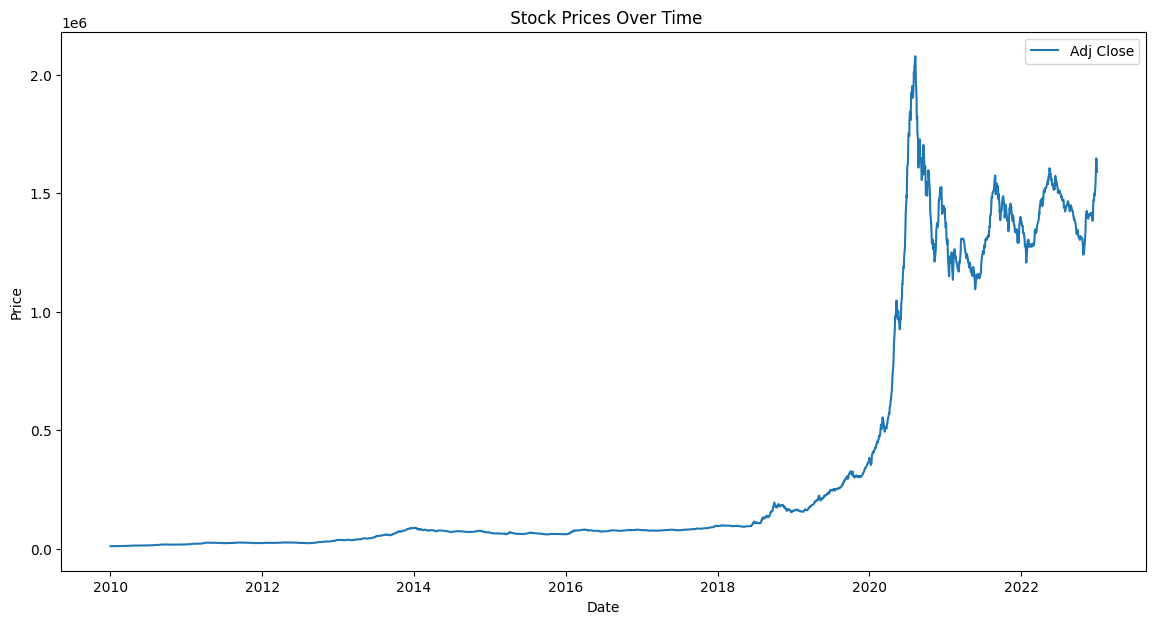

In [10]:
# Plotting the time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.title(' Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

The graph show the adjusted closing price of the stock from 2010 to 2022 and show the the stock price  started rising significantly around 2017, peaking sharply in 2020. After this peak, the price fluctuates considerably indicating high volatility.
The representation of the stock prices for the period ranging between 2010 and 2018 indicate a steep line with least volatility for the following few reasons. Based on this inflation index, one realized that the Iranian Rial had gone through inflation therefore the prices had generally risen in the long-run. Moreover, government bills in the Tehran Stock Exchange, regarding the market and stock  might have reduced daily fluctuations in the prices. The graph shows that majority of the stocks were cheaper with only a few of them being rather expensive; this created a sigmoid-like curve to the graph with most stock’s prices located at the lower side of the curve.

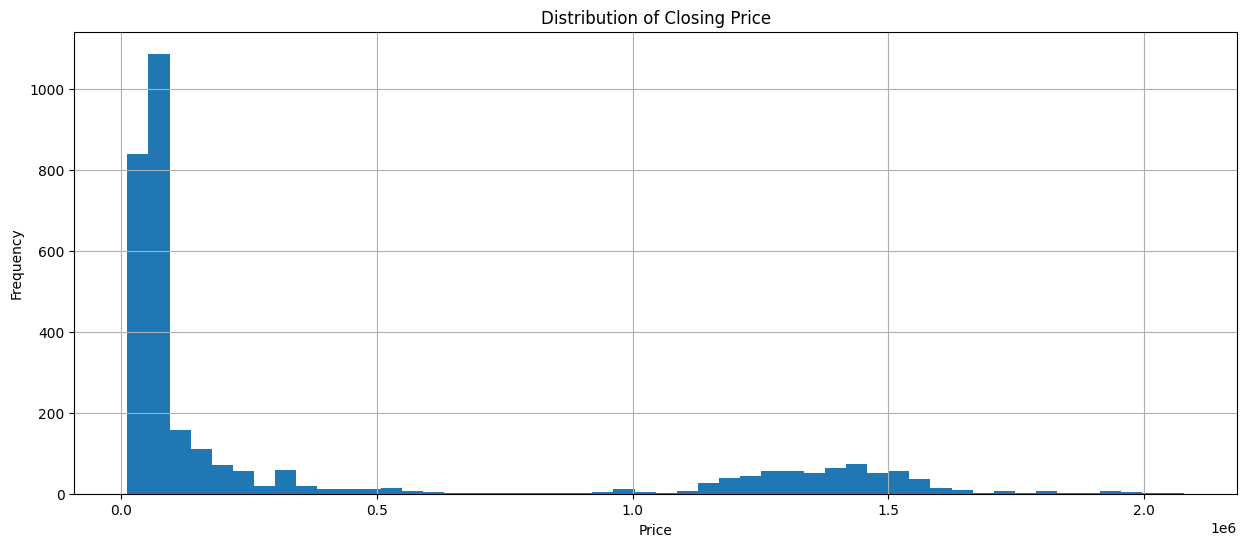

In [11]:
plt.figure(figsize=(15,6))
df['Adj Close'].hist(bins=50)
plt.title('Distribution of Closing Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Tthe closing prices on Tehran stock exchange have been depicted. Most of the prices are presented at the level below 0. 5 million, with a noticeable hump below 0. 2 million. The distribution of closing prices of the stocks appears to follow a power law distribution where the frequency disproportionately decreases as the prices rise, the complement of which appears as the long tail towards the right as the higher end values are fewer. This implies that the Company has more stocks which are cheap with very few which are expensive.


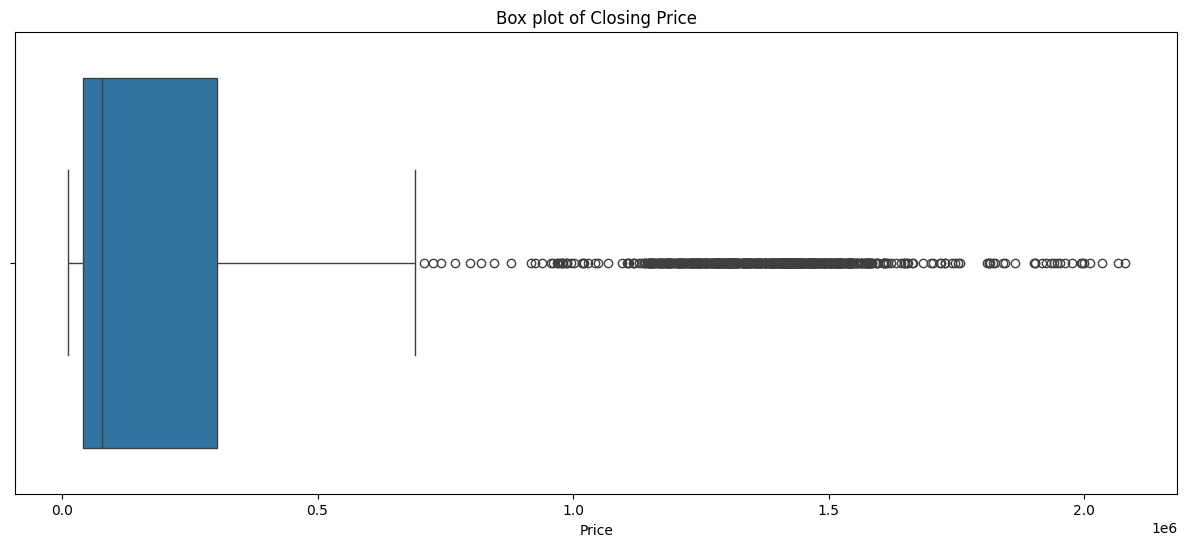

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Adj Close'])
plt.title('Box plot of Closing Price')
plt.xlabel('Price')
plt.show()

The box plot presents the stock’s adjusted closing price and the shape of the distribution, the median, upper and lower quartiles, and potential outliers. The bulk of the data is established in the less expensive price segments, while many peculiarities are shifted toward the higher prices. This aids in establishing mean, variability, and outliers of the dataset to see the trends in the fluctuation of stock prices and whether they contain unusually high/low values.

In [13]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.0 MB/s eta 0:00:00


In [14]:
import plotly.graph_objects as go
# Convert 'Date' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df1 = df1[required_columns]

# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df1['Date'],
    open=df1['Open'],
    high=df1['High'],
    low=df1['Low'],
    close=df1['Close'],
    name='Candlestick'
)])

# Add titles and labels
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the plot
fig.show()

Feature engineering

In [15]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.month for d in df.index]
df['day']=[d.day for d in df.index]
years = df['year'].unique()
df.head(10)

,Adj Close,year,month,day
2010-01-02,11295.2,2010,1,2
2010-01-03,11351.1,2010,1,3
2010-01-04,11305.1,2010,1,4
2010-01-05,11307.4,2010,1,5
2010-01-06,11375.4,2010,1,6
2010-01-09,11449.6,2010,1,9
2010-01-10,11592.3,2010,1,10
2010-01-11,11656.8,2010,1,11
2010-01-12,11646.2,2010,1,12
2010-01-13,11599.9,2010,1,13


<Axes: xlabel='day', ylabel='Adj Close'>

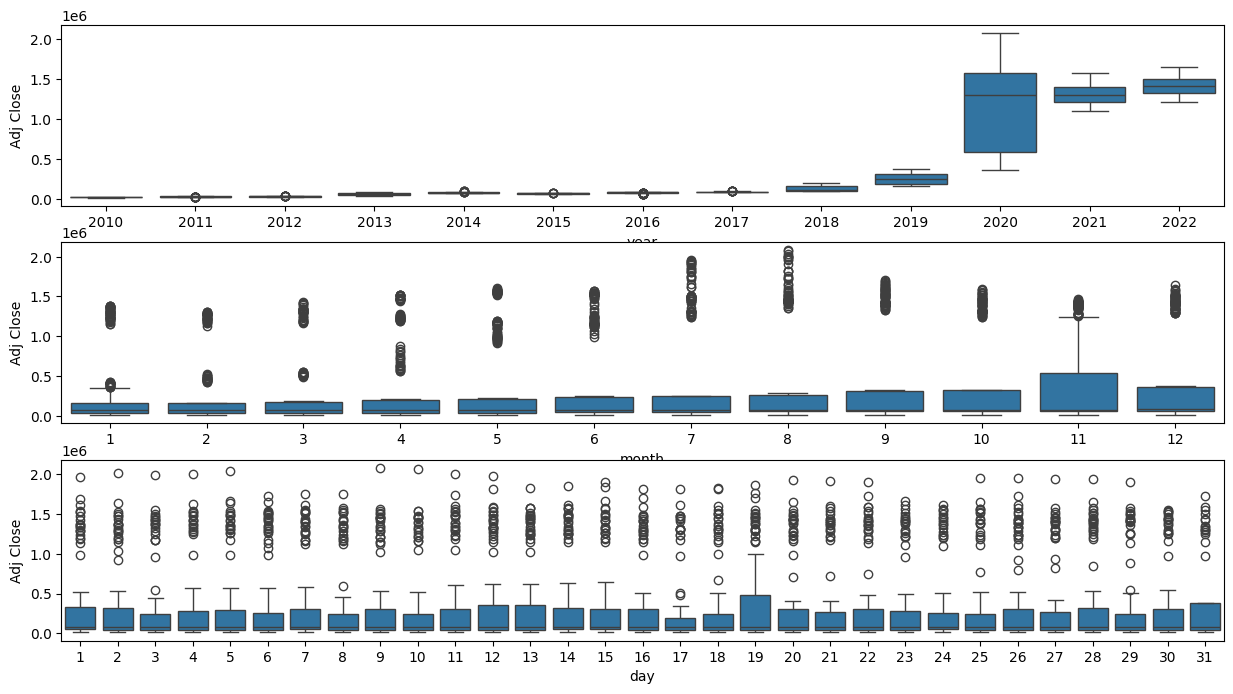

In [16]:
#Plot yearly and monthly values as boxplot
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.boxplot(x='year', y='Adj Close', data=df)
plt.subplot(312)
sns.boxplot(x='month', y='Adj Close', data=df)
plt.subplot(313)
sns.boxplot(x='day', y='Adj Close', data=df)

The provided boxplots display the distribution of adjusted closing prices for the Tehran Stock Exchange over different time intervals: yearly yearly, monthly and daily.  
Yearly Analysis:

Yearly boxplot represents that the stock prices have been gradually rising from 2019 and have shown a peak at 2020. This tends to show a higher level of market activity and or any economic forces that may have affected stock prices in these years. The next two years (2021 and 2022) depict a situation where inflation rates remain relatively constant but in a higher range than the previous years indicating growth or recovery.
Monthly Analysis:

Analyzing the data by the monthly boxplot, it is possible to state that there are fluctuations in stock prices connected with the seasons. As will be seen, prices generally rise and are much more buoyant in the later months of the year especially October and November. This could be occasioned by end of year accounts adjustments, activities of investors or market influences. The initial few months are seen to have comparatively lesser median prices along with lesser variations implying that these events are more consistent.
Daily Analysis:

The daily boxplot established that some days in the month have higher range and more extreme values implying they are more variable. For instance, it is observed that the price fluctions are more on 19 and 28: It might be due to some market characteristics, trading activity or event news that prevailed on these days affecting stock returns.
In sum, these visualizations are useful to decide trends, seasonality, and daily variation to understand the stock price movement patterns and predict them.

In [17]:
df=df.drop(["year","month","day"],axis=1)

In [18]:
data = df.values
data = data.astype('float32')
data

array([[  11295.2],
       [  11351.1],
       [  11305.1],
       ...,
       [1576396.8],
       [1647314.5],
       [1590495.5]], dtype=float32)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [20]:
train_size = int(len(data) * 0.66)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

Plot ACF PACF plot

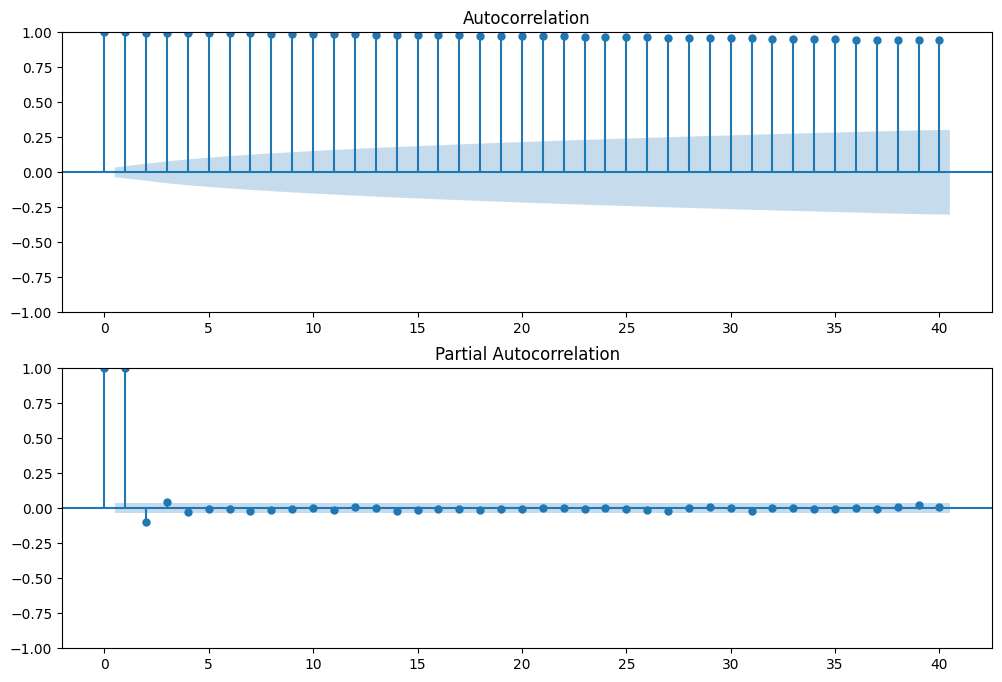

In [23]:
# ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data, ax=ax[0], lags=40)
plot_pacf(data, ax=ax[1], lags=40)
plt.show()

ACF carries high autocorrelation across many steps which means the observations remain strongly dependent on the preceding observations and thus identifies the time series as non-stationary. PACF has a significant spike only in the first lag and a value equal to almost zero in all other lags, specifying that the major impact is present in the first lag only. This pattern usually suggests an AR(1) process whereby the want is mostly driven by its value at a previous time period. More often, the differencing process may be required to render the records stationary for additional analysis and modeling.

# ARIMA Model

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

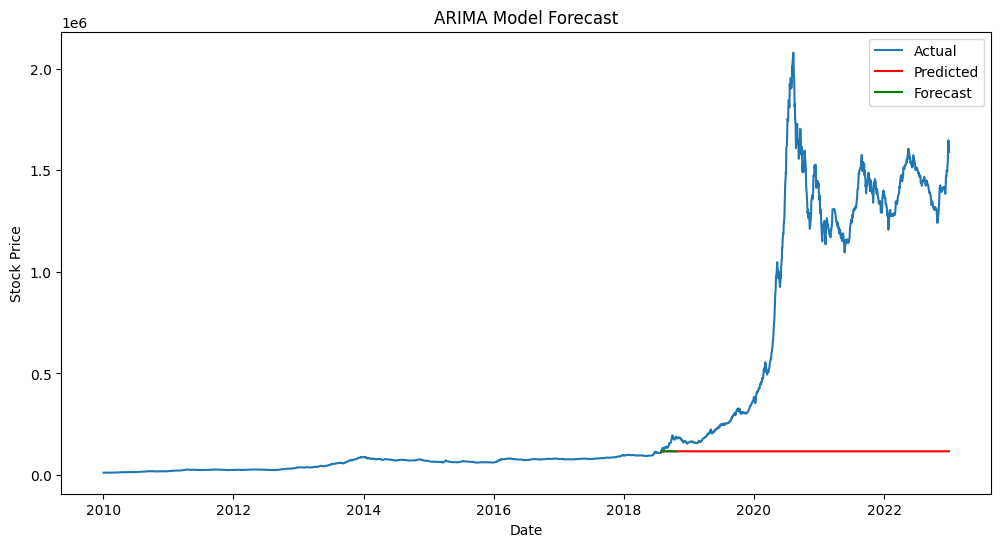

Mean Squared Error: 1017639123314.9467


In [25]:
# Fit ARIMA model on training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting the next 60 days data
forecast_steps = 60
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[train_size], periods=forecast_steps, freq='B')  # Business days

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, data, label='Actual')
plt.plot(df.index[train_size:], model_fit.predict(start=train_size, end=len(data)-1), color='red', label='Predicted')
plt.plot(forecast_index, forecast, color='green', label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Calculate and print the mean squared error
error = mean_squared_error(test, model_fit.predict(start=train_size, end=len(data)-1))
print(f'Mean Squared Error: {error}')

# LSTM Model

In [26]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [27]:
seq_size = 10


trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)



print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (2056, 10)
Shape of test set: (1055, 10)


In [28]:
import math
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D
from keras.layers import LSTM
from keras import losses

In [29]:
print('Build deep model...')
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary())

Build deep model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)


# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
65/65 - 2s - 28ms/step - acc: 0.0000e+00 - loss: 47985228.0000 - val_acc: 0.0000e+00 - val_loss: 2515032320.0000
Epoch 2/100
65/65 - 0s - 7ms/step - acc: 0.0000e+00 - loss: 1467187.8750 - val_acc: 0.0000e+00 - val_loss: 2310849024.0000
Epoch 3/100
65/65 - 1s - 9ms/step - acc: 0.0000e+00 - loss: 1414493.5000 - val_acc: 0.0000e+00 - val_loss: 2248606976.0000
Epoch 4/100
65/65 - 1s - 10ms/step - acc: 0.0000e+00 - loss: 1339064.8750 - val_acc: 0.0000e+00 - val_loss: 2169900544.0000
Epoch 5/100
65/65 - 1s - 9ms/step - acc: 0.0000e+00 - loss: 1370084.1250 - val_acc: 0.0000e+00 - val_loss: 2105211648.0000
Epoch 6/100
65/65 - 0s - 6ms/step - acc: 0.0000e+00 - loss: 1219665.5000 - val_acc: 0.0000e+00 - val_loss: 1987002880.0000
Epoch 7/100
65/65 - 1s - 9ms/step - acc: 0.0000e+00 - loss: 1199518.7500 - val_acc: 0.0000e+00 - val_loss: 1886131456.0000
Epoch 8/100
65/65 - 0s - 6ms/step - acc: 0.0000e+00 - loss: 1110442.7500 - val_acc: 0.0000e+00 - val_loss: 1787887744.0000
Epoch 9/100
6

Model evaluation

In [31]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [32]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1046124409.01 RMSE
Test Score: 43999922499.28 RMSE


Plot The results

In [33]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [34]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

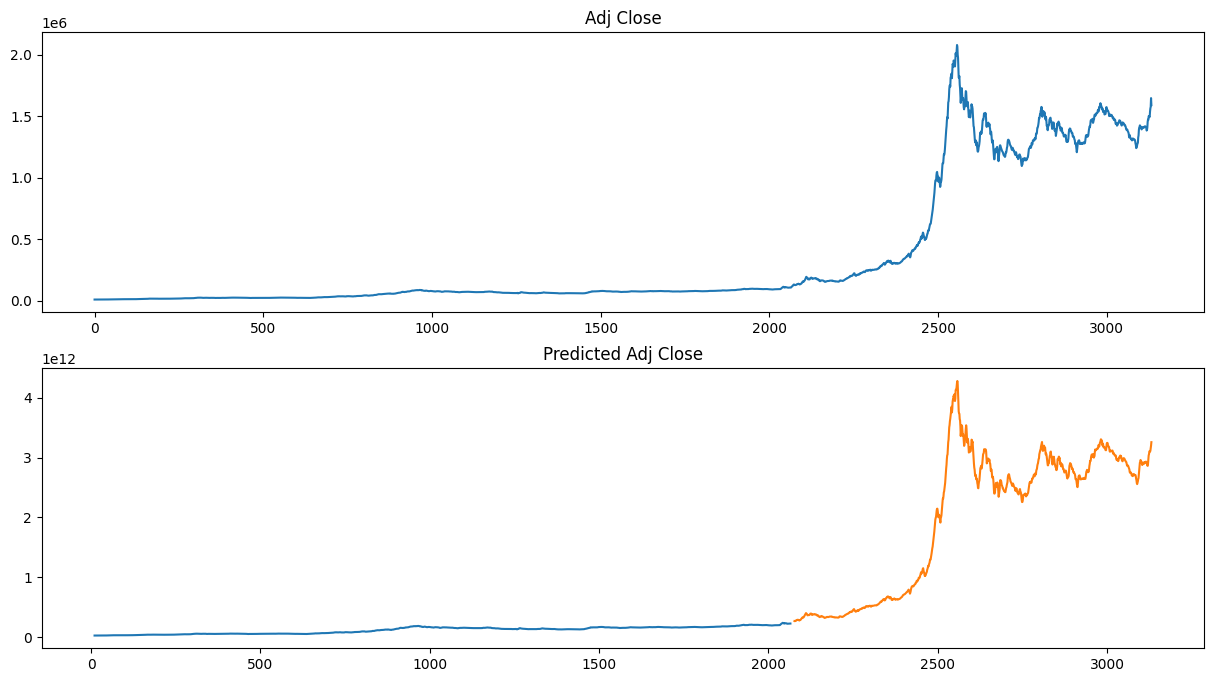

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title("Adj Close")
plt.plot(scaler.inverse_transform(dataset))
plt.subplot(212)
plt.title("Predicted Adj Close")
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()